# Laboratorio 4

------------

María Marta Ramirez Gil  21342                                   
Gustavo Andrés Gonzalez Pineda 21438  
Diego Leiva
Jose Pablo Orellana

Inteligencia Artificial                                                   
Universidad del Valle de Guatemala

------------

# Task 2.1

### Lectura y Limpieza de Datos

In [3]:
import numpy as np
from random import uniform
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

Leer los datos

In [4]:
df = pd.read_csv("bank_transactions.csv", sep=",")

In [5]:
n = int(input("ingrese el numero de rows:"))
df.head(n)

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0


Informacion del dataset

In [6]:
tipos_de_datos = df.dtypes
print(tipos_de_datos)

TransactionID               object
CustomerID                  object
CustomerDOB                 object
CustGender                  object
CustLocation                object
CustAccountBalance         float64
TransactionDate             object
TransactionTime              int64
TransactionAmount (INR)    float64
dtype: object


In [7]:
df.duplicated().sum()

0

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048567 entries, 0 to 1048566
Data columns (total 9 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   TransactionID            1048567 non-null  object 
 1   CustomerID               1048567 non-null  object 
 2   CustomerDOB              1045170 non-null  object 
 3   CustGender               1047467 non-null  object 
 4   CustLocation             1048416 non-null  object 
 5   CustAccountBalance       1046198 non-null  float64
 6   TransactionDate          1048567 non-null  object 
 7   TransactionTime          1048567 non-null  int64  
 8   TransactionAmount (INR)  1048567 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 72.0+ MB


Nulos

In [9]:
print(df.isnull().sum())

TransactionID                 0
CustomerID                    0
CustomerDOB                3397
CustGender                 1100
CustLocation                151
CustAccountBalance         2369
TransactionDate               0
TransactionTime               0
TransactionAmount (INR)       0
dtype: int64


Conteo de valores únicos en variables categóricas

In [10]:
print(df['CustGender'].value_counts())
print(df['CustLocation'].value_counts())

M    765530
F    281936
T         1
Name: CustGender, dtype: int64
MUMBAI                    103595
NEW DELHI                  84928
BANGALORE                  81555
GURGAON                    73818
DELHI                      71019
                           ...  
CENTRAL MALL BANGALORE         1
NADALA                         1
MANDIR JM ROAD PUNE            1
NEW PANVEL RAIGARH             1
CHEMMUMIAPET                   1
Name: CustLocation, Length: 9355, dtype: int64


Encoding CustGender

In [11]:
# Encoding Para CustGender 1 si es mujer y 0 si es hombre
df['CustGender'] = df['CustGender'].map({'F': 1, 'M': 0})
df.head(10)

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,1.0,JAMSHEDPUR,17819.05,2/8/16,143207,25.00
1,T2,C2142763,4/4/57,0.0,JHAJJAR,2270.69,2/8/16,141858,27999.00
2,T3,C4417068,26/11/96,1.0,MUMBAI,17874.44,2/8/16,142712,459.00
3,T4,C5342380,14/9/73,1.0,MUMBAI,866503.21,2/8/16,142714,2060.00
4,T5,C9031234,24/3/88,1.0,NAVI MUMBAI,6714.43,2/8/16,181156,1762.50
5,T6,C1536588,8/10/72,1.0,ITANAGAR,53609.20,2/8/16,173940,676.00
6,T7,C7126560,26/1/92,1.0,MUMBAI,973.46,2/8/16,173806,566.00
7,T8,C1220223,27/1/82,0.0,MUMBAI,95075.54,2/8/16,170537,148.00
8,T9,C8536061,19/4/88,1.0,GURGAON,14906.96,2/8/16,192825,833.00
9,T10,C6638934,22/6/84,0.0,MUMBAI,4279.22,2/8/16,192446,289.11


a int

In [12]:
df['CustGender'].fillna(0, inplace=True)
df['CustGender'] = df['CustGender'].astype(int)

df.head(10)

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,1,JAMSHEDPUR,17819.05,2/8/16,143207,25.00
1,T2,C2142763,4/4/57,0,JHAJJAR,2270.69,2/8/16,141858,27999.00
2,T3,C4417068,26/11/96,1,MUMBAI,17874.44,2/8/16,142712,459.00
3,T4,C5342380,14/9/73,1,MUMBAI,866503.21,2/8/16,142714,2060.00
4,T5,C9031234,24/3/88,1,NAVI MUMBAI,6714.43,2/8/16,181156,1762.50
5,T6,C1536588,8/10/72,1,ITANAGAR,53609.20,2/8/16,173940,676.00
6,T7,C7126560,26/1/92,1,MUMBAI,973.46,2/8/16,173806,566.00
7,T8,C1220223,27/1/82,0,MUMBAI,95075.54,2/8/16,170537,148.00
8,T9,C8536061,19/4/88,1,GURGAON,14906.96,2/8/16,192825,833.00
9,T10,C6638934,22/6/84,0,MUMBAI,4279.22,2/8/16,192446,289.11


Encoding CustLocation

In [13]:
# Calcular frecuencia de cada ubicación
location_freq = df['CustLocation'].value_counts(normalize=True)

# Mapear la frecuencia de cada ubicación al dataset
df['CustLocation_FreqEncoded'] = df['CustLocation'].map(location_freq)

# Eliminar la columna original de CustLocation si ya no es necesaria
df.drop(columns=['CustLocation'], inplace=True)

# Verificar el cambio
print(df.head())

  TransactionID CustomerID CustomerDOB  CustGender  CustAccountBalance  \
0            T1   C5841053     10/1/94           1            17819.05   
1            T2   C2142763      4/4/57           0             2270.69   
2            T3   C4417068    26/11/96           1            17874.44   
3            T4   C5342380     14/9/73           1           866503.21   
4            T5   C9031234     24/3/88           1             6714.43   

  TransactionDate  TransactionTime  TransactionAmount (INR)  \
0          2/8/16           143207                     25.0   
1          2/8/16           141858                  27999.0   
2          2/8/16           142712                    459.0   
3          2/8/16           142714                   2060.0   
4          2/8/16           181156                   1762.5   

   CustLocation_FreqEncoded  
0                  0.001509  
1                  0.000822  
2                  0.098811  
3                  0.098811  
4                  0.01247

In [14]:
df.head(10)

,TransactionID,CustomerID,CustomerDOB,CustGender,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),CustLocation_FreqEncoded
0,T1,C5841053,10/1/94,1,17819.05,2/8/16,143207,25.00,0.001509
1,T2,C2142763,4/4/57,0,2270.69,2/8/16,141858,27999.00,0.000822
2,T3,C4417068,26/11/96,1,17874.44,2/8/16,142712,459.00,0.098811
3,T4,C5342380,14/9/73,1,866503.21,2/8/16,142714,2060.00,0.098811
4,T5,C9031234,24/3/88,1,6714.43,2/8/16,181156,1762.50,0.012476
5,T6,C1536588,8/10/72,1,53609.20,2/8/16,173940,676.00,0.000199
6,T7,C7126560,26/1/92,1,973.46,2/8/16,173806,566.00,0.098811
7,T8,C1220223,27/1/82,0,95075.54,2/8/16,170537,148.00,0.098811
8,T9,C8536061,19/4/88,1,14906.96,2/8/16,192825,833.00,0.070409
9,T10,C6638934,22/6/84,0,4279.22,2/8/16,192446,289.11,0.098811


In [15]:
print(df['CustGender'].value_counts())
print(df['CustLocation_FreqEncoded'].value_counts())

0    766631
1    281936
Name: CustGender, dtype: int64
0.098811    103595
0.081006     84928
0.077789     81555
0.070409     73818
0.067739     71019
             ...  
0.000113       118
0.000105       110
0.000104       109
0.000092        96
0.000080        84
Name: CustLocation_FreqEncoded, Length: 471, dtype: int64


### Balanceo

In [16]:
class_distribution = df['CustGender'].value_counts()
print(class_distribution)

0    766631
1    281936
Name: CustGender, dtype: int64


En este caso aunque los datos se vean desbalanceados, no importa para nuestro algoritmo a que K-means no se ve afectado por el desequilibrio en la distribución de los datos de la misma manera que otros algoritmos de aprendizaje supervisado, como la clasificación.

### Escalar Variables
Se escalaran las varibles CustAccountBalance, TransactionTime, y TransactionAmount (INR)

In [17]:
# Lista de columnas a escalar
columnas_a_escalar = ['CustAccountBalance', 'TransactionTime', 'TransactionAmount (INR)']

# Crear un MinMaxScaler
scaler = MinMaxScaler()

# Aplicar el escalado solo a las columnas seleccionadas
df[columnas_a_escalar] = scaler.fit_transform(df[columnas_a_escalar])

In [18]:
df.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),CustLocation_FreqEncoded
0,T1,C5841053,10/1/94,1,0.000155,2/8/16,0.606915,0.000016,0.001509
1,T2,C2142763,4/4/57,0,0.000020,2/8/16,0.601198,0.017948,0.000822
2,T3,C4417068,26/11/96,1,0.000155,2/8/16,0.604817,0.000294,0.098811
3,T4,C5342380,14/9/73,1,0.007532,2/8/16,0.604825,0.001320,0.098811
4,T5,C9031234,24/3/88,1,0.000058,2/8/16,0.767744,0.001130,0.012476


### Eleccion de Variables

Para este algoritmo de K-means se usaran las variables 'CustGender', 'CustAccountBalance', 'TransactionTime', 'ransactionAmount (INR)' y 'CustLocation_FreqEncoded'.

Revision de Nulos

In [19]:
df.isnull().sum()

TransactionID                  0
CustomerID                     0
CustomerDOB                 3397
CustGender                     0
CustAccountBalance          2369
TransactionDate                0
TransactionTime                0
TransactionAmount (INR)        0
CustLocation_FreqEncoded     151
dtype: int64

In [20]:
df = df.dropna()

In [21]:
df.dtypes

TransactionID                object
CustomerID                   object
CustomerDOB                  object
CustGender                    int64
CustAccountBalance          float64
TransactionDate              object
TransactionTime             float64
TransactionAmount (INR)     float64
CustLocation_FreqEncoded    float64
dtype: object

Quitar las Columnas que no fueron elegidas para tener un dataset mas limpio

In [22]:
df = df.drop(['TransactionID', 'CustomerID', 'CustomerDOB', 'TransactionDate'], axis = 1)

In [48]:
df.describe()

df_norm = (df - df.min())/(df.max() - df.min())
df_norm.describe()


,CustGender,CustAccountBalance,TransactionTime,TransactionAmount (INR),CustLocation_FreqEncoded
count,1.042651e+06,1.042651e+06,1.042651e+06,1.042651e+06,1.042651e+06
mean,2.691553e-01,9.988769e-04,6.658613e-01,1.004005e-03,3.738848e-01
std,4.435210e-01,7.357263e-03,2.172465e-01,4.205075e-03,3.741005e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,4.099178e-05,5.256803e-01,1.025618e-04,1.369770e-02
50%,0.000000e+00,1.455500e-04,6.960658e-01,2.929421e-04,2.224839e-01
75%,1.000000e+00,4.988649e-04,8.476854e-01,7.692135e-04,7.872464e-01
max,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


# Implementacion del Modelo K-Means

## Eleccion de número de Clusters

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/threadpoolctl.py:1019: RuntimeWarning: libc not found. The ctypes module in Python 3.9 is maybe too old for this OS.
  warnings.warn(


Text(0, 0.5, 'WSCC')

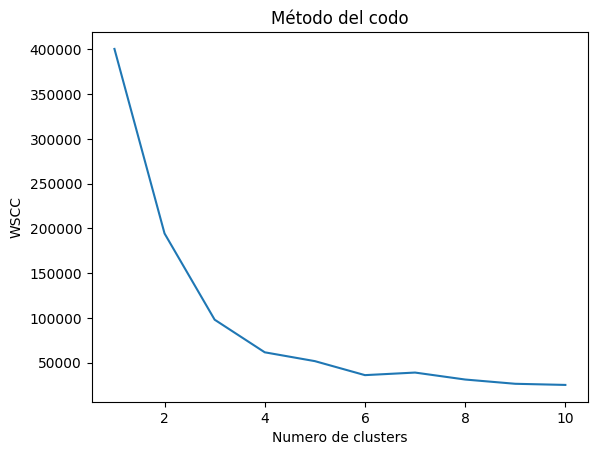

In [60]:
from sklearn.cluster import KMeans

wscc = [] #Within cluster sum of squares 

for i in range(1,11):
    kmeans = KMeans(n_clusters = i, max_iter = 300)
    kmeans.fit(df_norm) #Aplicamos KMeans a los datos
    wscc.append(kmeans.inertia_)

plt.plot(range(1,11), wscc)
plt.title("Método del codo")
plt.xlabel("Numero de clusters")
plt.ylabel("WSCC") #WSCC es un indicador de que tan similares son los individuos

Usamos el método del codo para determinar el número de clusters, en este caso se usarán 3 ya que despues de 3 clusters, la varianza ya no reduce significativamente.

## Modelo

In [57]:
def euclidean(point, data):
    """
    Euclidean distance between point & data.
    Point has dimensions (m,), data has dimensions (n,m), and output will be of size (n,).
    """
    len_pont = len(point)
    len_data = len(data[0])
    return np.sqrt(np.sum((point - data)**2, axis=1))

def read_data(df: pd.DataFrame):
    """
    Read the data and return a numpy array
    """
    column_names = df.columns

    # Convert each column to a NumPy array
    arrays = [np.array(df[col]) for col in column_names]

    # Stack the arrays into a single NumPy array
    return np.stack(arrays, axis=1)


def k_means(data: np.ndarray, n_clusters: int, max_iters: int = 100):
    """
    K-means algorithm
    """

    max_, min_ = np.min(data, axis=0), np.max(data, axis=0)
    centroids = [uniform(min_, max_) for _ in range(n_clusters)]
    print(centroids)

    iter = 0 
    prev_centroids = None   
    cluster_points = None 

    while np.not_equal(centroids, prev_centroids).any() and iter < max_iters:
        distances = []

        # Measure the distance between each point and the centroids
        for centroid in centroids:
            dist = euclidean(centroid, data)
            distances.append(dist)
        
        # Assign points to a cluster
        closest_centroid =  np.argmin(distances, axis=0)
        cluster_points = [[] for _ in range(n_clusters)]

        for idx, centroid_idx in enumerate(closest_centroid):
            cluster_points[centroid_idx].append(data[idx])

        prev_centroids = centroids.copy()
        for idx, cluster_point in enumerate(cluster_points):            
            new_centroid = np.mean(cluster_point, axis=0)
            centroids[idx] = new_centroid

        iter += 1

    return cluster_points, centroids, closest_centroid

                    
np_data = read_data(df)
n_clusters = 3
cluster_points, centroids, labels = k_means(np_data, n_clusters)
print(df)



[array([0.33521376, 0.33521376, 0.33521376, 0.33521376, 0.03312343]), array([0.93207728, 0.93207728, 0.93207728, 0.93207728, 0.09209952]), array([0.12593887, 0.12593887, 0.12593887, 0.12593887, 0.01244498])]
         CustGender  CustAccountBalance  TransactionTime  \
0                 1            0.000155         0.606915   
1                 0            0.000020         0.601198   
2                 1            0.000155         0.604817   
3                 1            0.007532         0.604825   
4                 1            0.000058         0.767744   
...             ...                 ...              ...   
1048562           0            0.000066         0.783289   
1048563           0            0.000237         0.778669   
1048564           0            0.001928         0.776885   
1048565           0            0.000088         0.782789   
1048566           0            0.000658         0.768023   

         TransactionAmount (INR)  CustLocation_FreqEncoded  
0         

## Visualización

In [50]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
principal_components = pca.fit_transform(df_norm)

principal_components

array([[ 0.63991576, -0.50167045],
       [-0.33995726, -0.3023172 ],
       [ 0.84282145,  0.46191014],
       ...,
       [-0.29230218, -0.0925088 ],
       [-0.32918147, -0.26816358],
       [-0.28690522, -0.06605474]])

No handles with labels found to put in legend.


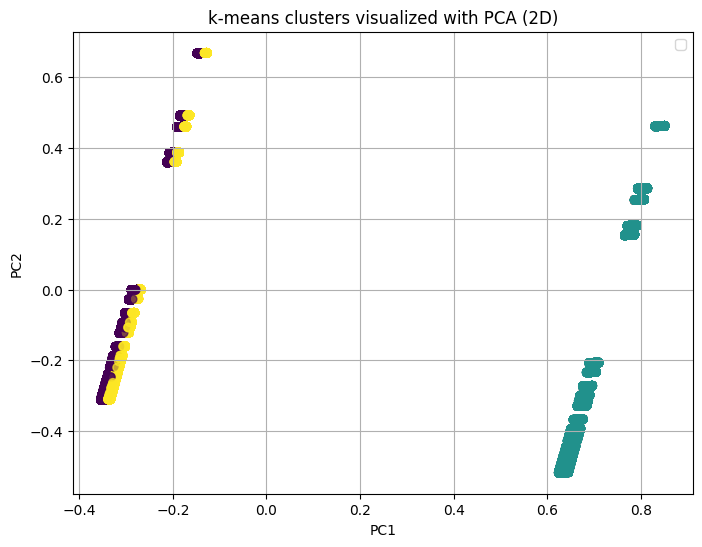

In [51]:
plt.figure(figsize=(8, 6))
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=closest_centroid, cmap='viridis', alpha=0.7)

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('k-means clusters visualized with PCA (2D)')
plt.grid(True)
plt.show()

## Modelo con librerias

In [63]:
clustering = KMeans(n_clusters = 3, max_iter = 100) #Creamos el modelo
clustering.fit(df_norm) #Aplica el modelo a los datos

KMeans(max_iter=100, n_clusters=3)

In [64]:
clustering.labels_

array([1, 0, 1, ..., 0, 0, 0], dtype=int32)

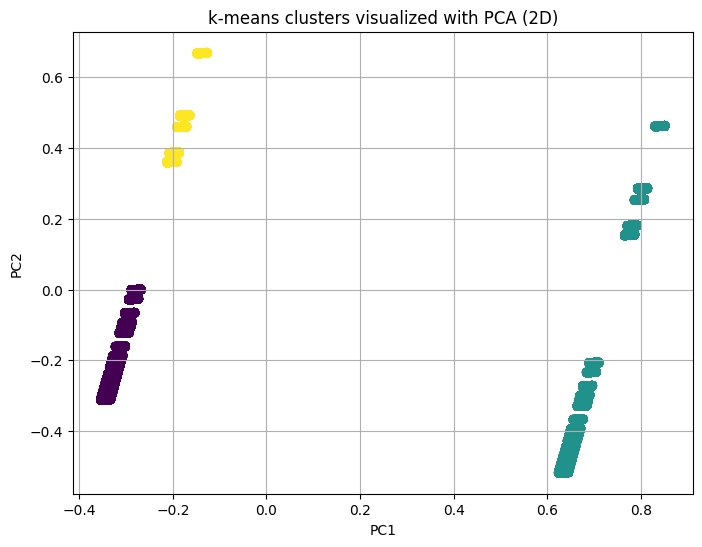

In [66]:
plt.figure(figsize=(8, 6))
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=clustering.labels_, cmap='viridis', alpha=0.7)

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('k-means clusters visualized with PCA (2D)')
plt.grid(True)
plt.show()

In [71]:
from sklearn.metrics import silhouette_score

def sse(X, labels):
  """
  Calculate the Sum of Squared Errors (SSE) for a k-means clustering.

  Args:
    X: (n_samples, n_features) array of data points.
    labels: (n_samples,) array of cluster labels.

  Returns:
    float: The total SSE value.
  """
  return np.sum((X - np.take(centroids, labels, axis=0))**2).sum()

print("Nuestro modelo: ", sse(np_data, labels))
print("Sklearn: ", sse(np_data, clustering.labels_))

Nuestro modelo:  50652.72067991466
Sklearn:  569734.7330500095


## Metrica de desempeño
La implementación de la librería sklearn parece tener clusters mejor separados, y por lo tanto mejores; sin embargo la implementación de tiene un Mean Squared Error más bajo que, aunque indica clusters más estrechos, no necesariamente mejor separación,